## Predict Podcast Listening Time
Our task it to predict listening time of a podcast episode given multiple attributes of an episode.

[Competetion Page](https://www.kaggle.com/competitions/playground-series-s5e4/overview)

___

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

In [2]:
# load the data
def load_dataset():
    return pd.read_csv('../datasets/train.csv')

podcasts = load_dataset()

In [3]:
podcasts.head(5)

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


In [4]:
podcasts = podcasts.set_index("id")

podcasts.head(2)

,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
id,,,,,,,,,,,
0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,Joke Junction,Episode 26,119.8,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241


In [5]:
# print the information about dataset
podcasts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750000 entries, 0 to 749999
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Podcast_Name                 750000 non-null  object 
 1   Episode_Title                750000 non-null  object 
 2   Episode_Length_minutes       662907 non-null  float64
 3   Genre                        750000 non-null  object 
 4   Host_Popularity_percentage   750000 non-null  float64
 5   Publication_Day              750000 non-null  object 
 6   Publication_Time             750000 non-null  object 
 7   Guest_Popularity_percentage  603970 non-null  float64
 8   Number_of_Ads                749999 non-null  float64
 9   Episode_Sentiment            750000 non-null  object 
 10  Listening_Time_minutes       750000 non-null  float64
dtypes: float64(5), object(6)
memory usage: 68.7+ MB


**Preliminary observation about the data**
1. There are total of 750000 rows, 11 columns. (originally it was 12, id column was made index)
2. `Listening_Time_minutes` is our target which is a continuous variable, so this problem becomes a `Linear Regression` problem, i.e. we have to predict a Number.
3. `Podcast_Name` ia categorical data, although it looks less useful feature but in reality naming also affects people clicking a podcast or video. But it does not look easy to use this feature. 
4. `Episode_Title` looks useless as it is just an episode number.
5. `Episode_Length_minutes` can be useful, because length of podcase affects listening time. But it has some `Null` values.
6. 

#### Descriptive Statistics

In [6]:
# for numerical attributes
podcasts.describe()

,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
count,662907.000000,750000.000000,603970.000000,749999.000000,750000.000000
mean,64.504738,59.859901,52.236449,1.348855,45.437406
std,32.969603,22.873098,28.451241,1.151130,27.138306
min,0.000000,1.300000,0.000000,0.000000,0.000000
25%,35.730000,39.410000,28.380000,0.000000,23.178350
50%,63.840000,60.050000,53.580000,1.000000,43.379460
75%,94.070000,79.530000,76.600000,2.000000,64.811580
max,325.240000,119.460000,119.910000,103.910000,119.970000


In [7]:
# for categorical attributes
podcasts.describe(include="O")

,Podcast_Name,Episode_Title,Genre,Publication_Day,Publication_Time,Episode_Sentiment
count,750000,750000,750000,750000,750000,750000
unique,48,100,10,7,4,3
top,Tech Talks,Episode 71,Sports,Sunday,Night,Neutral
freq,22847,10515,87606,115946,196849,251291


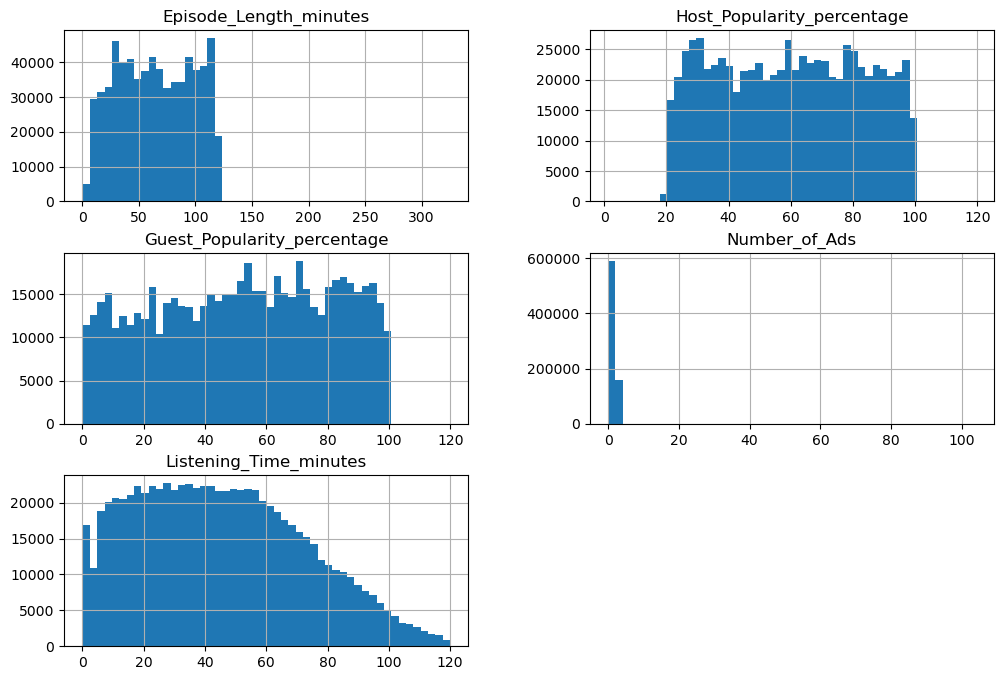

In [8]:
podcasts.hist(bins=50, figsize=(12, 8))
plt.show()

### Sampling the data
Since the training data is quite huge, its difficult to process it at once. So we will take a sample of the training set. 
Also, we need not create a test and train set because that's already been done.

In [9]:
# sample size
sample_size = int(0.1 * podcasts.shape[0])
podcasts_batch = podcasts.sample(n=sample_size, random_state=42)

### Exploring and Visualizing the Dataset

In [10]:
# we create a copy because we will need podcasts_batch later for transformation and training, so all the exploratory transformation happens on podcasts_explore
podcasts_explore = podcasts_batch.copy()
podcasts_explore.shape

(75000, 11)

#### Looking for Correlations

In [11]:
# correlation matrix 
corr_matrix = podcasts_explore.corr(numeric_only=True)
corr_matrix

,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
Episode_Length_minutes,1.000000,0.026821,-0.006255,-0.051191,0.916900
Host_Popularity_percentage,0.026821,1.000000,0.022135,-0.023121,0.050901
Guest_Popularity_percentage,-0.006255,0.022135,1.000000,0.014697,-0.013606
Number_of_Ads,-0.051191,-0.023121,0.014697,1.000000,-0.107461
Listening_Time_minutes,0.916900,0.050901,-0.013606,-0.107461,1.000000


Episode length in mins has a very strong correlation with listening time.

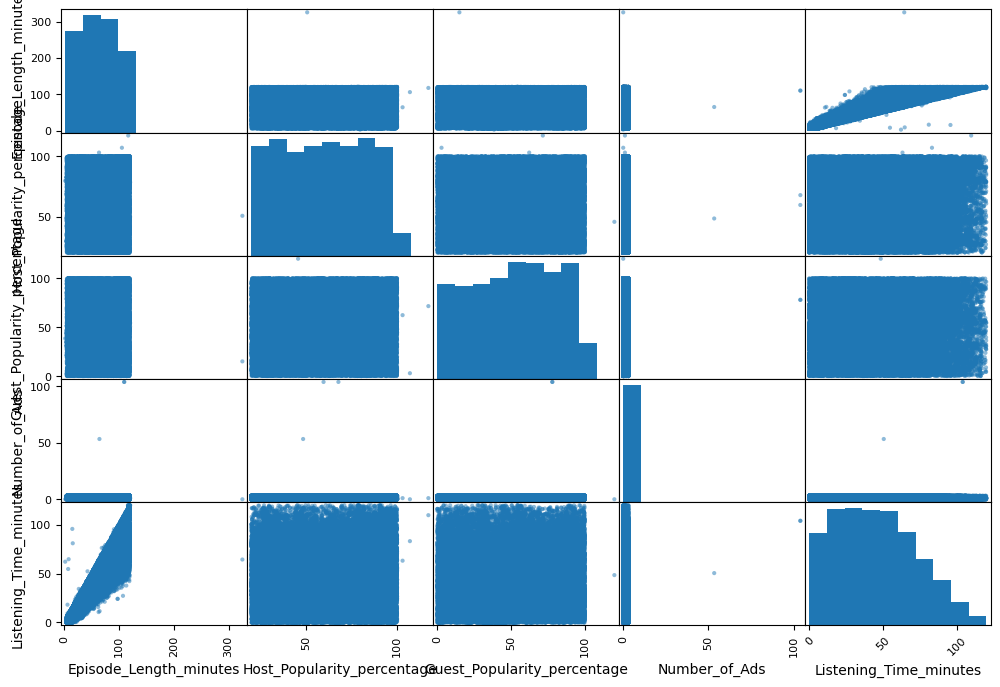

In [12]:
from pandas.plotting import scatter_matrix

scatter_matrix(podcasts_explore, figsize=(12, 8))
plt.xticks(rotation=45)
plt.show()

#### Podcast_Name

In [13]:
print(podcasts_batch['Podcast_Name'].unique())
print(len(podcasts_batch['Podcast_Name'].unique()))

['Daily Digest' 'Joke Junction' 'Business Briefs' 'Brain Boost'
 'Humor Hub' 'Healthy Living' 'Tune Time' 'Gadget Geek' 'Tech Talks'
 'Detective Diaries' 'Style Guide' 'Sports Weekly' 'Digital Digest'
 'Game Day' 'Tech Trends' 'Mind & Body' 'Sports Central' 'Wellness Wave'
 'Sport Spot' 'Global News' 'Home & Living' 'Educational Nuggets'
 'Crime Chronicles' 'Sound Waves' 'Life Lessons' 'Fitness First'
 'Laugh Line' 'Current Affairs' "Athlete's Arena" 'Fashion Forward'
 'Melody Mix' 'News Roundup' 'Music Matters' 'Study Sessions' 'Innovators'
 'Finance Focus' 'Business Insights' 'World Watch' 'Criminal Minds'
 'Mystery Matters' 'Comedy Corner' 'Funny Folks' 'True Crime Stories'
 'Lifestyle Lounge' 'Market Masters' 'Learning Lab' 'Health Hour'
 'Money Matters']
48


Out of like 750000 podcasts, we have 48 unique podcasts running.

### Episode_Length_minutes

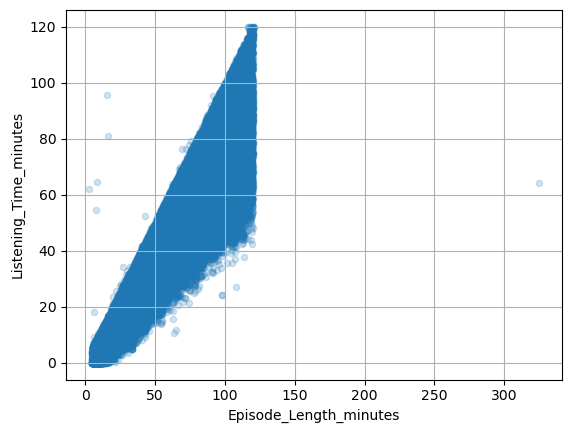

In [14]:
# plt.scatter(x=podcasts_batch["Episode_Length_minutes"],
#             y=podcasts_batch["Listening_Time_minutes"])
# plt.xlabel("Episode Length (mins)")
# plt.ylabel("Listening Time (mins)")

podcasts_explore.plot(
    kind='scatter', x="Episode_Length_minutes", y="Listening_Time_minutes", grid=True, alpha=0.2)

plt.show()

There is a clear outlier in episode length, so we remove the point.

In [15]:
podcasts_tr = podcasts_explore[podcasts_explore['Episode_Length_minutes'] < 150]
podcasts_tr.head()

,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
id,,,,,,,,,,,
404846,Daily Digest,Episode 74,46.59,News,58.43,Wednesday,Night,81.92,2.0,Positive,20.91979
580313,Joke Junction,Episode 30,45.37,Comedy,76.57,Wednesday,Night,45.79,0.0,Positive,42.66054
552086,Business Briefs,Episode 16,54.67,Business,96.00,Saturday,Afternoon,NaN,3.0,Positive,43.30069
370876,Brain Boost,Episode 31,61.76,Education,69.57,Sunday,Morning,17.08,1.0,Positive,48.56000
590719,Healthy Living,Episode 94,80.69,Health,92.67,Monday,Afternoon,NaN,0.0,Neutral,61.73136


Text(0, 0.5, 'Listening Time (mins)')

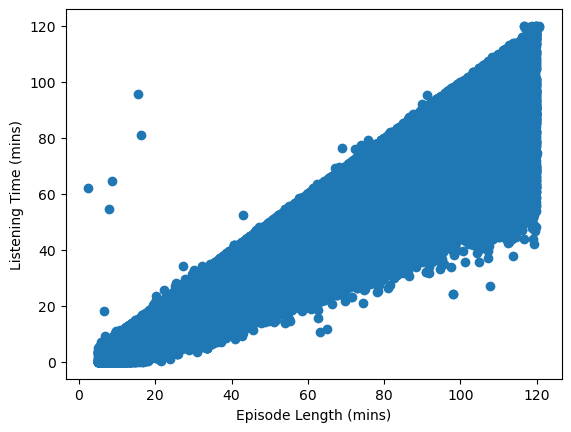

In [16]:
plt.scatter(x=podcasts_tr["Episode_Length_minutes"],
            y=podcasts_tr["Listening_Time_minutes"])
plt.xlabel("Episode Length (mins)")
plt.ylabel("Listening Time (mins)")

In [17]:
podcasts_explore["Genre"].value_counts()

Genre
Technology    8717
Sports        8655
True Crime    8625
Lifestyle     8341
Comedy        8095
Business      8011
Health        6958
News          6387
Music         6309
Education     4902
Name: count, dtype: int64

In [18]:
genre_listening_time = podcasts_explore.groupby(
    'Genre')['Listening_Time_minutes'].mean()

genre_listening_time

Genre
Business      45.089215
Comedy        44.857919
Education     45.698452
Health        45.735224
Lifestyle     45.746656
Music         45.927869
News          44.669127
Sports        44.363648
Technology    45.778478
True Crime    45.666692
Name: Listening_Time_minutes, dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Business'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Education'),
  Text(3, 0, 'Health'),
  Text(4, 0, 'Lifestyle'),
  Text(5, 0, 'Music'),
  Text(6, 0, 'News'),
  Text(7, 0, 'Sports'),
  Text(8, 0, 'Technology'),
  Text(9, 0, 'True Crime')])

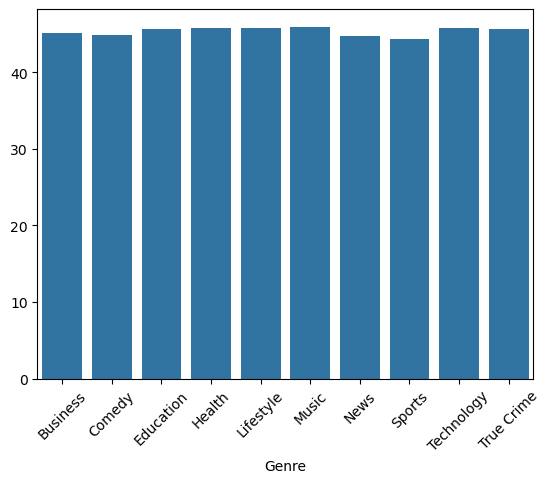

In [19]:
sns.barplot(x=genre_listening_time.index, y=genre_listening_time.values)
plt.xticks(rotation=45)

### Host_Popularity_percentage

Text(0, 0.5, 'Listening Time')

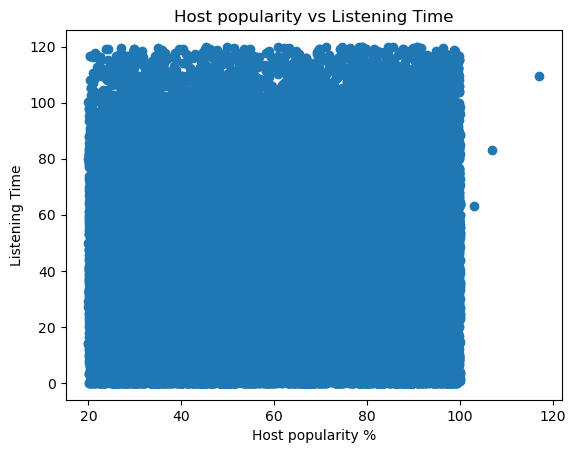

In [20]:
plt.scatter(podcasts_explore["Host_Popularity_percentage"],
            podcasts_explore["Listening_Time_minutes"])
plt.title('Host popularity vs Listening Time')
plt.xlabel('Host popularity %')
plt.ylabel('Listening Time')

In [21]:
podcasts_batch['Host_Popularity_percentage'].describe()

count    75000.000000
mean        59.977682
std         22.877921
min         20.000000
25%         39.560000
50%         60.150000
75%         79.560000
max        117.140000
Name: Host_Popularity_percentage, dtype: float64

### Publication_Day

In [22]:
publication_listening_time = podcasts_explore.groupby(
    "Publication_Day")['Listening_Time_minutes'].mean()

publication_listening_time

Publication_Day
Friday       44.775643
Monday       45.910524
Saturday     44.973578
Sunday       44.856996
Thursday     44.608752
Tuesday      46.264681
Wednesday    46.000353
Name: Listening_Time_minutes, dtype: float64

<BarContainer object of 7 artists>

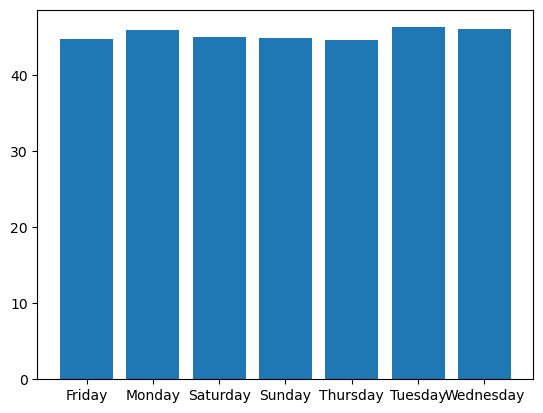

In [23]:
plt.bar(publication_listening_time.index, publication_listening_time.values)

### Preparing Data for Model Training
Data Cleaning and Transformation

First of all we will segregate the label and features from the dataset

In [24]:
label_name = "Listening_Time_minutes"
y_train =  podcasts_batch[label_name].copy()
X_train = podcasts_batch.drop(label_name, axis=1)

X_train.head()

,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
id,,,,,,,,,,
404846,Daily Digest,Episode 74,46.59,News,58.43,Wednesday,Night,81.92,2.0,Positive
580313,Joke Junction,Episode 30,45.37,Comedy,76.57,Wednesday,Night,45.79,0.0,Positive
552086,Business Briefs,Episode 16,54.67,Business,96.00,Saturday,Afternoon,NaN,3.0,Positive
370876,Brain Boost,Episode 31,61.76,Education,69.57,Sunday,Morning,17.08,1.0,Positive
239330,Humor Hub,Episode 15,NaN,Comedy,79.20,Saturday,Morning,21.31,0.0,Positive


#### Data Cleaning
First, we need to clean the data. There are missing values in many rows, which need to be imputed. 
Also, we should use Sklean Imputer such that we can use this imputer later with new datasets.

In [25]:
from sklearn.impute import SimpleImputer

In [26]:
imputer = SimpleImputer(strategy="median")

# we will only apply this imputer to numerical attributes
X_train_num = X_train.select_dtypes(include=[np.number])

# fit the imputer
imputer.fit(X_train_num)

SimpleImputer(strategy='median')

In [27]:
imputer.statistics_

array([63.82, 60.15, 53.49,  1.  ])

In [28]:
# transform the dataset with computed impute values
X = imputer.transform(X_train_num)

In [29]:
X

array([[ 46.59,  58.43,  81.92,   2.  ],
       [ 45.37,  76.57,  45.79,   0.  ],
       [ 54.67,  96.  ,  53.49,   3.  ],
       ...,
       [ 66.92,  30.54,  44.32,   0.  ],
       [102.65,  68.8 ,  53.49,   1.  ],
       [ 74.8 ,  43.86,  83.35,   1.  ]], shape=(75000, 4))

#### Handling Categorical Data

In [30]:
X_train_cat = X_train.select_dtypes(exclude=[np.number])
X_train_cat.head()

,Podcast_Name,Episode_Title,Genre,Publication_Day,Publication_Time,Episode_Sentiment
id,,,,,,
404846,Daily Digest,Episode 74,News,Wednesday,Night,Positive
580313,Joke Junction,Episode 30,Comedy,Wednesday,Night,Positive
552086,Business Briefs,Episode 16,Business,Saturday,Afternoon,Positive
370876,Brain Boost,Episode 31,Education,Sunday,Morning,Positive
239330,Humor Hub,Episode 15,Comedy,Saturday,Morning,Positive


In [31]:
X_train_cat["Episode_Sentiment"].value_counts()

Episode_Sentiment
Neutral     25117
Negative    25016
Positive    24867
Name: count, dtype: int64

In [32]:
X_train_cat["Genre"].value_counts()

Genre
Technology    8717
Sports        8655
True Crime    8625
Lifestyle     8341
Comedy        8095
Business      8011
Health        6958
News          6387
Music         6309
Education     4902
Name: count, dtype: int64

In [33]:
X_train_cat["Publication_Time"].value_counts()

Publication_Time
Night        19665
Evening      19655
Afternoon    17912
Morning      17768
Name: count, dtype: int64

In [34]:
X_train_cat["Publication_Day"].value_counts()

Publication_Day
Sunday       11592
Monday       11243
Friday       10786
Wednesday    10774
Thursday     10438
Saturday     10268
Tuesday       9899
Name: count, dtype: int64

In [35]:
# One Hot Encoding
from sklearn.preprocessing import OneHotEncoder


cat_encoder = OneHotEncoder()

# this will output a Sparse Matrix which can be converted into Numpy array then a dataframe
episode_sentiment_1hot_encoded = cat_encoder.fit_transform(X_train_cat[["Episode_Sentiment"]])

In [36]:
episode_sentiment_1hot_encoded.toarray() # There are 3 columns

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], shape=(75000, 3))

In [37]:
cat_encoder.categories_

[array(['Negative', 'Neutral', 'Positive'], dtype=object)]

In [38]:
cat_encoder.feature_names_in_

array(['Episode_Sentiment'], dtype=object)

In [39]:
cat_encoder.get_feature_names_out()

array(['Episode_Sentiment_Negative', 'Episode_Sentiment_Neutral',
       'Episode_Sentiment_Positive'], dtype=object)

In [40]:
X_train_cat[["Episode_Sentiment"]].index

Index([404846, 580313, 552086, 370876, 239330, 590719, 491326, 271448, 430275,
       245481,
       ...
       405070,  74048, 168838, 219177, 303079, 287900, 205721, 402882,  84197,
       135041],
      dtype='int64', name='id', length=75000)

In [41]:
# using above info we can re-create a dataframe 
df_output = pd.DataFrame(episode_sentiment_1hot_encoded.toarray(), columns=cat_encoder.get_feature_names_out(
), index=X_train_cat[["Episode_Sentiment"]].index)

df_output.head()

,Episode_Sentiment_Negative,Episode_Sentiment_Neutral,Episode_Sentiment_Positive
id,,,
404846,0.0,0.0,1.0
580313,0.0,0.0,1.0
552086,0.0,0.0,1.0
370876,0.0,0.0,1.0
239330,0.0,0.0,1.0


In [42]:
X_train_cat["Episode_Sentiment"].loc[404846]

'Positive'

#### Feature Scaling & Transformation

### Transformation Pipelines

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_pipeline

In [44]:
num_pipeline = Pipeline(
    steps=[
        ("ipute", SimpleImputer(strategy="median")),
        ('standardize', StandardScaler())
    ]
)

num_pipeline

Pipeline(steps=[('ipute', SimpleImputer(strategy='median')),
                ('standardize', StandardScaler())])

In [45]:
df_prepared = num_pipeline.fit_transform(X_train_num)

df_prepared[:4]

array([[-0.57176215, -0.06765005,  1.15490392,  0.51843134],
       [-0.61110742,  0.72525945, -0.25852867, -1.08758585],
       [-0.31118039,  1.57455556,  0.04270108,  1.32143994],
       [-0.08252635,  0.41928555, -1.38168532, -0.28457725]])

In [46]:
df_prepared_output = pd.DataFrame(df_prepared, columns=num_pipeline.get_feature_names_out(), index=X_train_num.index)

df_prepared_output.head(6)

,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads
id,,,,
404846,-0.571762,-0.067650,1.154904,0.518431
580313,-0.611107,0.725259,-0.258529,-1.087586
552086,-0.311180,1.574556,0.042701,1.321440
370876,-0.082526,0.419286,-1.381685,-0.284577
239330,-0.016091,0.840218,-1.216205,-1.087586
590719,0.527970,1.428999,0.042701,-1.087586


#### Outliers Removal

In [47]:
X_train_num[(X_train_num["Guest_Popularity_percentage"]>100) | (X_train_num["Host_Popularity_percentage"] > 100)]

,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads
id,,,,
253381,NaN,45.70,119.91,0.0
599478,117.26,117.14,71.48,1.0
222880,105.76,107.02,2.91,0.0
132903,64.04,103.00,62.26,1.0


<Axes: >

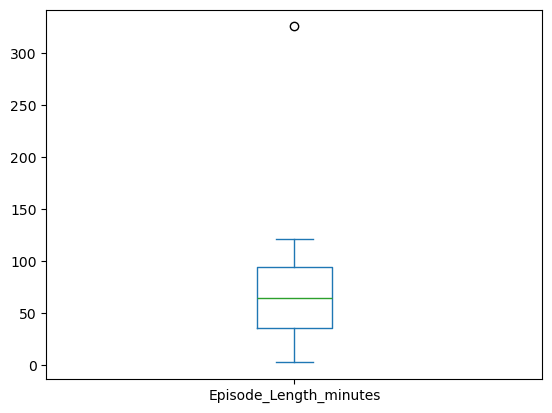

In [48]:
X_train_num["Episode_Length_minutes"].plot(kind="box")

<Axes: >

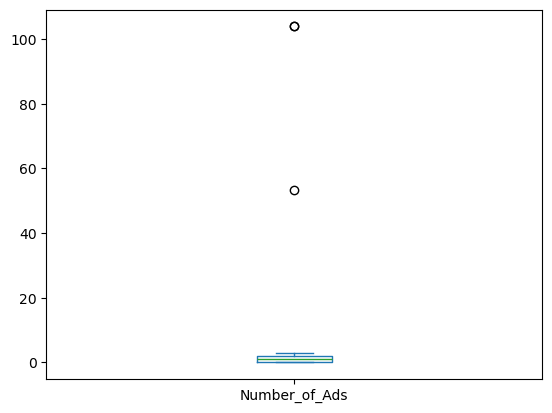

In [49]:
X_train_num["Number_of_Ads"].plot(kind="box")

In [50]:
X_train_num["Number_of_Ads"].describe()

count    75000.000000
mean         1.354389
std          1.245325
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max        103.910000
Name: Number_of_Ads, dtype: float64

In [51]:
IQR_ads = 2
outlier_upper = 1.5 * IQR_ads + 2
outlier_upper

5.0

In [52]:
num_outliers = X_train_num[(X_train_num["Guest_Popularity_percentage"] > 100) | (X_train_num["Host_Popularity_percentage"] > 100) | (X_train_num["Episode_Length_minutes"] > 150) | (X_train_num["Number_of_Ads"] > 5)]
num_outliers

,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads
id,,,,
683147,109.93,59.66,77.91,103.88
211159,64.83,48.46,NaN,53.37
253381,NaN,45.70,119.91,0.00
599478,117.26,117.14,71.48,1.00
283606,109.93,67.81,77.90,103.91
222880,105.76,107.02,2.91,0.00
132903,64.04,103.00,62.26,1.00
101637,325.24,50.69,15.01,0.00


In [53]:
num_pipeline = Pipeline(
    steps=[
        # ("outlier_removal", FunctionTransformer(lambda df: df[~((df["Guest_Popularity_percentage"] > 100) | (
        #     df["Host_Popularity_percentage"] > 100) | (df["Episode_Length_minutes"] > 150) | (df["Number_of_Ads"] > 5))])),
        ("impute", SimpleImputer(strategy="median")),
    ]
)

# NOTE: each estimator outputs a numpy array or sparse matrix not a pandas dataframe 
# we can also make a separate pipeline just to handle outliers.

# REVIEW: where should outlier removal be placed in workflow; in pipeline it becomes a problem for column transformer also we need to remove respective target values as well

In [54]:
num_pipeline

Pipeline(steps=[('impute', SimpleImputer(strategy='median'))])

In [55]:
df_prepared = num_pipeline.fit_transform(X_train_num)
df_prepared[:5]

df_prepared.shape

(75000, 4)

#### Column Transformer (final to apply for preprocessing)

In [56]:
X_train.head(3)

,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
id,,,,,,,,,,
404846,Daily Digest,Episode 74,46.59,News,58.43,Wednesday,Night,81.92,2.0,Positive
580313,Joke Junction,Episode 30,45.37,Comedy,76.57,Wednesday,Night,45.79,0.0,Positive
552086,Business Briefs,Episode 16,54.67,Business,96.00,Saturday,Afternoon,NaN,3.0,Positive


In [57]:
cat_pipeline = Pipeline(
    steps=[
        ("impute", SimpleImputer(strategy="most_frequent")),
        ("encoding_one_hot", OneHotEncoder(handle_unknown="ignore"))
    ]
)

In [58]:
preprocessing = ColumnTransformer(
    transformers=[
        ("numerical", num_pipeline, make_column_selector(dtype_include=np.number)), # either we can pass names of cols or dtype to select quickly
        ("categorical", cat_pipeline, 
         ["Genre", "Publication_Day", "Publication_Time", "Episode_Sentiment"])
    ]
)

# by default the columns not mentioned will be dropped; this can be controlled with remainder hyperparameter

In [59]:
# try this preprocessig on a dataset
X_train.shape

(75000, 10)

In [60]:
X_train.head()

,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
id,,,,,,,,,,
404846,Daily Digest,Episode 74,46.59,News,58.43,Wednesday,Night,81.92,2.0,Positive
580313,Joke Junction,Episode 30,45.37,Comedy,76.57,Wednesday,Night,45.79,0.0,Positive
552086,Business Briefs,Episode 16,54.67,Business,96.00,Saturday,Afternoon,NaN,3.0,Positive
370876,Brain Boost,Episode 31,61.76,Education,69.57,Sunday,Morning,17.08,1.0,Positive
239330,Humor Hub,Episode 15,NaN,Comedy,79.20,Saturday,Morning,21.31,0.0,Positive


In [61]:
# Outlier Removal

# ("outlier_removal", FunctionTransformer(lambda df: df[~((df["Guest_Popularity_percentage"] > 100) | (
#     df["Host_Popularity_percentage"] > 100) | (df["Episode_Length_minutes"] > 150) | (df["Number_of_Ads"] > 5))])),

def remove_outliers(X: pd.DataFrame, y: pd.DataFrame):
    X_cleaned = X[~((X["Guest_Popularity_percentage"] > 100) | (
        X["Host_Popularity_percentage"] > 100) | (X["Episode_Length_minutes"] > 150) | (X["Number_of_Ads"] > 5))]
    y_cleaned = y[X_cleaned.index]
    
    return X_cleaned, y_cleaned

In [62]:
X_train_clean, y_train_clean = remove_outliers(X_train, y_train)

In [63]:
X_train_clean.shape

(74992, 10)

In [64]:
# try the preprocessing pipeline 

X_train_prepared = preprocessing.fit_transform(X_train_clean)

X_train_prepared.shape

(74992, 28)

In [65]:
preprocessing.get_feature_names_out()

array(['numerical__Episode_Length_minutes',
       'numerical__Host_Popularity_percentage',
       'numerical__Guest_Popularity_percentage',
       'numerical__Number_of_Ads', 'categorical__Genre_Business',
       'categorical__Genre_Comedy', 'categorical__Genre_Education',
       'categorical__Genre_Health', 'categorical__Genre_Lifestyle',
       'categorical__Genre_Music', 'categorical__Genre_News',
       'categorical__Genre_Sports', 'categorical__Genre_Technology',
       'categorical__Genre_True Crime',
       'categorical__Publication_Day_Friday',
       'categorical__Publication_Day_Monday',
       'categorical__Publication_Day_Saturday',
       'categorical__Publication_Day_Sunday',
       'categorical__Publication_Day_Thursday',
       'categorical__Publication_Day_Tuesday',
       'categorical__Publication_Day_Wednesday',
       'categorical__Publication_Time_Afternoon',
       'categorical__Publication_Time_Evening',
       'categorical__Publication_Time_Morning',
       'ca

### Training a model

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
# at this stage preprocessing has already learnt the parameters with fit_transform, and it will only transform now

lin_reg = make_pipeline(preprocessing, LinearRegression())

# X_train_clean is not preprocessed transformed right!!!
lin_reg.fit(X_train_clean, y_train_clean)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x306f6c440>),
                                                 ('categorical',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding_one_hot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Genre', 'Publication_Day',
                                                   'Publication_Time',
                                                   'Episode_Sentiment'])])),
                ('linearregression', LinearRegression())])

In [68]:
predictions = lin_reg.predict(X_train_clean)
predictions[:5].round(2)

array([31.32, 34.73, 36.83, 45.38, 48.74])

In [69]:
y_train_clean.iloc[:5].values

array([20.91979, 42.66054, 43.30069, 48.56   , 48.53842])

In [70]:
# mean squared error
from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(y_train_clean, predictions)

np.sqrt(lin_rmse)

np.float64(13.318692434290506)

In [71]:
y_train_clean.describe()

count    74992.000000
mean        45.331160
std         27.127438
min          0.000000
25%         23.057893
50%         43.281600
75%         64.735920
max        119.900000
Name: Listening_Time_minutes, dtype: float64

In [72]:
lin_reg.score(X_train_clean, y_train_clean)

0.7589476340699001

### Lets bring in the real dataset

In [73]:
X = podcasts.drop(label_name, axis=1)
y = podcasts[label_name].copy()

In [74]:
X.shape, y.shape

((750000, 10), (750000,))

In [75]:
X.head()

,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
id,,,,,,,,,,
0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive
1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative
2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative
3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive
4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral


In [76]:
y.head()

id
0    31.41998
1    88.01241
2    44.92531
3    46.27824
4    75.61031
Name: Listening_Time_minutes, dtype: float64

In [77]:
# Remove outliers and then preprocess in the pipelines

X_train, y_train = remove_outliers(X, y)

X_train.shape, y_train.shape

((749946, 10), (749946,))

In [78]:
# we are again calling fit_transform so new parameters will be learnt
X_train_prepared = preprocessing.fit_transform(X_train)

X_train_prepared.shape

(749946, 28)

In [79]:
lin_reg = make_pipeline(preprocessing, LinearRegression())

lin_reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x306f6c440>),
                                                 ('categorical',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding_one_hot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Genre', 'Publication_Day',
                                                   'Publication_Time',
                                                   'Episode_Sentiment'])])),
                ('linearregression', LinearRegression())])

In [80]:
y_predicted = lin_reg.predict(X_train)
y_predicted[:5]

array([49.53695555, 85.54786186, 55.12171973, 47.32451982, 77.32822971])

In [81]:
y_train.iloc[:5].values

array([31.41998, 88.01241, 44.92531, 46.27824, 75.61031])

In [82]:
lin_reg.score(X_train, y_train)

0.757821853073983

In [83]:
lin_rmse = mean_squared_error(y_train, y_predicted)

np.sqrt(lin_rmse)

np.float64(13.354832530940572)

Okay Lets try Decision Tree Regressor

In [84]:
# from sklearn.tree import DecisionTreeRegressor

# tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))

# tree_reg.fit(X_train, y_train)

it took 13 mins to train the above Tree model.

In [85]:
# tree_reg.score(X_train, y_train)

Wow! over 99% accuracy, but this can be too good to declare a winning model. This can be a case of overfitting. So we might need to check with cross validation.

In [86]:
# from sklearn.model_selection import cross_val_score

# tree_rmse = -cross_val_score(tree_reg, X_train, y_train, scoring="neg_root_mean_squared_error", cv=5)

# pd.Series(tree_rmse).describe()

In [87]:
# from sklearn.ensemble import RandomForestRegressor

# forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))

# forest_rmse = -cross_val_score(forest_reg, X_train,
#                                y_train, scoring="neg_root_mean_squared_error", cv=5)

In [88]:
from sklearn.model_selection import train_test_split

X_train_train, X_train_test, y_train_train, y_train_test = train_test_split(X_train, y_train, test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestRegressor


forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))

forest_reg.fit(X_train_train, y_train_train)